# test

In [1]:
from __future__ import print_function, division

import torch
from torchvision import transforms
import os
from torch.nn import functional as F
from utils.folder2lmdb import ImageFolderLMDB
import yaml
import tqdm
from utils.ImageFolderPaths import ImageFolderWithPaths
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve,auc

In [6]:
model_name='VGG16'

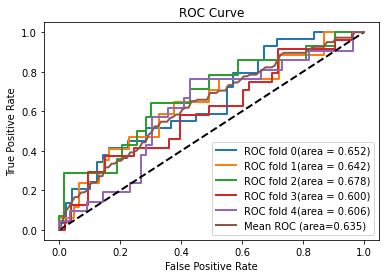

In [ ]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
# 5-fold
for folder in range(5):
    file='/home/bio19/bio1/model_cache/{}_details{}.csv'.format(model_name,folder)
    csvPD=pd.read_csv(file)
    # 不筛选形成字典
    person_prob_dict = {}
    for i in range(len(csvPD['names'])):
        file = '-'.join(csvPD['names'][i].split('-')[:3])
        if file not in person_prob_dict.keys():
            person_prob_dict[file] = {'prob_0': [], 'prob_1': [],
                                      'label': csvPD['labels'][i],'predicts':[]}  
        person_prob_dict[file]['prob_0'].append(csvPD['prob_0'][i])
        person_prob_dict[file]['prob_1'].append(csvPD['prob_1'][i])
        person_prob_dict[file]['predicts'].append(csvPD['predicted'][i])
    y_label=[]
    y_pre=[]
    for key in person_prob_dict.keys():
        y_label.append(person_prob_dict[key]['label'])
        y_pre.append(sum(person_prob_dict[key]['prob_1'])/(sum(person_prob_dict[key]['prob_1'])+sum(person_prob_dict[key]['prob_0'])))
    fpr, tpr, thersholds = roc_curve(y_label, y_pre)
    tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label='ROC fold {}(area = {:.3f})'.format(folder,roc_auc), lw=2)
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='k')
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,label=r'Mean ROC (area=%0.3f)'%mean_auc,lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

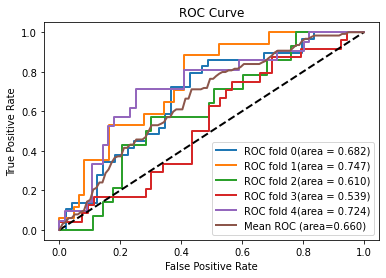

In [112]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
# 5-fold
for folder in range(5):
    file='/home/bio19/bio1/model_cache/{}_details{}.csv'.format(model_name,folder)
    csvPD=pd.read_csv(file)
    # 筛选形成字典
    person_prob_dict = {}
    for i in range(len(csvPD['names'])):
        file = '-'.join(csvPD['names'][i].split('-')[:3])
        if file not in person_prob_dict.keys():
            person_prob_dict[file] = {'prob_0': [], 'prob_1': [],
                                      'label': csvPD['labels'][i],'predicts':[]} 
        if csvPD['prob_0'][i]>0.7 or csvPD['prob_1'][i]>0.7 :  
            person_prob_dict[file]['prob_0'].append(csvPD['prob_0'][i])
            person_prob_dict[file]['prob_1'].append(csvPD['prob_1'][i])
            person_prob_dict[file]['predicts'].append(csvPD['predicted'][i])
    y_label=[]
    y_pre=[]
    for key in person_prob_dict.keys():
        y_label.append(person_prob_dict[key]['label'])
        y_pre.append(sum(person_prob_dict[key]['prob_1'])/(sum(person_prob_dict[key]['prob_1'])+sum(person_prob_dict[key]['prob_0'])))
    fpr, tpr, thersholds = roc_curve(y_label, y_pre)
    tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label='ROC fold {}(area = {:.3f})'.format(folder,roc_auc), lw=2)
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='k')
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,label=r'Mean ROC (area=%0.3f)'%mean_auc,lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [113]:
# 对列表进行排序，针对列表长度是奇数还是偶数的不同情况，计算中位数。
def get_median(data):
    data = sorted(data)
    size = len(data)
    if size % 2 == 0: # 判断列表长度为偶数
        median = (data[size//2]+data[size//2-1])/2
        data[0] = median
    if size % 2 == 1: # 判断列表长度为奇数
        median = data[(size-1)//2]
        data[0] = median
    return data[0]


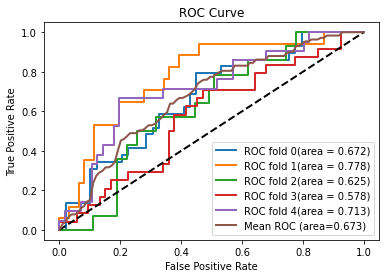

In [114]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
# 5-fold
for folder in range(5):
    file='/home/bio19/bio1/model_cache/{}_details{}.csv'.format(model_name,folder)
    csvPD=pd.read_csv(file)
    # 不筛选形成字典
    person_prob_dict = {}
    for i in range(len(csvPD['names'])):
        file = '-'.join(csvPD['names'][i].split('-')[:3])
        if file not in person_prob_dict.keys():
            person_prob_dict[file] = {'prob_0': [], 'prob_1': [],
                                      'label': csvPD['labels'][i], 'predicts':[],'zhongweishu':[]}  
        person_prob_dict[file]['prob_0'].append(csvPD['prob_0'][i])
        person_prob_dict[file]['prob_1'].append(csvPD['prob_1'][i])
        person_prob_dict[file]['predicts'].append(csvPD['predicted'][i])
    y_label=[]
    y_pre=[]
    for key in person_prob_dict.keys():
        y_label.append(person_prob_dict[key]['label'])
        y_pre.append(get_median(person_prob_dict[key]['prob_1']))
    fpr, tpr, thersholds = roc_curve(y_label, y_pre)
    tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr, tpr)    
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label='ROC fold {}(area = {:.3f})'.format(folder,roc_auc), lw=2)
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='k')
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,label=r'Mean ROC (area=%0.3f)'%mean_auc,lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

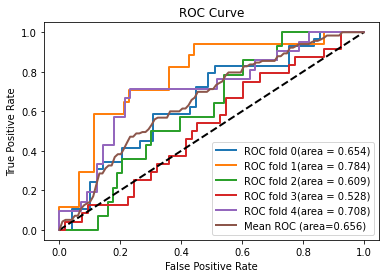

In [115]:
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
# 5-fold
for folder in range(5):
    file='/home/bio19/bio1/model_cache/{}_details{}.csv'.format(model_name,folder)
    csvPD=pd.read_csv(file)
    # 筛选形成字典
    person_prob_dict = {}
    for i in range(len(csvPD['names'])):
        file = '-'.join(csvPD['names'][i].split('-')[:3])
        if file not in person_prob_dict.keys():
            person_prob_dict[file] = {'prob_0': [], 'prob_1': [],
                                      'label': csvPD['labels'][i], 'predicts':[],'zhongweishu':[]}  
        if csvPD['prob_0'][i]>0.7 or csvPD['prob_1'][i]>0.7 :  
            person_prob_dict[file]['prob_0'].append(csvPD['prob_0'][i])
            person_prob_dict[file]['prob_1'].append(csvPD['prob_1'][i])
            person_prob_dict[file]['predicts'].append(csvPD['predicted'][i])
    y_label=[]
    y_pre=[]
    for key in person_prob_dict.keys():
        y_label.append(person_prob_dict[key]['label'])
        y_pre.append(get_median(person_prob_dict[key]['prob_1']))
    fpr, tpr, thersholds = roc_curve(y_label, y_pre)
    tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0]=0.0
    roc_auc = auc(fpr, tpr)    
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label='ROC fold {}(area = {:.3f})'.format(folder,roc_auc), lw=2)
plt.plot([0,1],[0,1],linestyle='--',lw=2,color='k')
mean_tpr=np.mean(tprs,axis=0)
mean_tpr[-1]=1.0
mean_auc=auc(mean_fpr,mean_tpr)
std_auc=np.std(tprs,axis=0)
plt.plot(mean_fpr,mean_tpr,label=r'Mean ROC (area=%0.3f)'%mean_auc,lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")